### What are the most demanded skills for the top 3 most popular data roles?

### Objective

> In this section the primary goal will be the following:

- The most paying jobs out of the popular three.
- Identity the most lucrative skills for data science.

Methodology

1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

## Import Libraries

In [2]:
# let's inistall the libraries first 
!pip install -q datasets
!pip install -q adjustText
!pip install -q requests


In [3]:
# WE can now import all of the necessary libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 
import requests # to get the continents for the jobs

## Load Dataset

In [4]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

## Data Cleaning

In [5]:
# Data Cleanup for the first two columns befoer hand
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
# country for analysis and per continent analysis as well
df_country = df['job_country'].value_counts().to_frame(name='count')
df_country.reset_index(inplace=True)
df_country.rename(columns={'index':'Country'},inplace=True)
df_country.drop(columns='count',inplace=True)
df_country.head()

,Country
0,United States
1,India
2,United Kingdom
3,France
4,Germany
...,...
155,Guinea
156,Mauritania
157,Lesotho
158,Bhutan


In [7]:
def get_continent(country):
    try:
        # Use the RestCountries API to fetch country information
        response = requests.get(f'https://restcountries.com/v3.1/name/{country}')
        data = response.json()
        return data[0]['continents'][0]  
    except Exception as e:
        return 'Unknown'


# Apply the function to the job_country column
df_country['continent'] = df_country['Country'].apply(get_continent)

In [8]:

fix_continents = {
    "United States": "North America",
    "Australia": "Oceania",
    "New Zealand": "Oceania",
    "Guam": "Oceania",
    "U.S. Virgin Islands": "North America",
    "Macedonia (FYROM)": "Europe",
    "Congo, Democratic Republic of the": "Africa",
    "Fiji": "Oceania",
    "Papua New Guinea": "Oceania",
    "Northern Mariana Islands": "Oceania"
}

# Update the continent column based on the mapping
df_country['continent'] = df_country['Country'].map(fix_continents).fillna(df_country['continent'])

In [10]:
df.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [14]:
df_merged = df.merge(df_country, how='left',left_on='job_country',right_on='Country')
df_merged.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,Country,continent
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,United States,North America
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Mexico,North America
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",Germany,Europe


### Explode Skills

Converts the `job_skills` column from string representations of lists into actual list objects and then expands these lists so each skill appears in its own row. It then displays the `job_title` and `job_skills` columns, allowing us to analyze the distribution of skills across different data job titles.

In [43]:
df_skills = df_merged.explode('job_skills')

df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,r
1,Data Analyst,python
1,Data Analyst,sql
1,Data Analyst,nosql
...,...,...
785739,Data Engineer,kafka
785739,Data Engineer,kubernetes
785739,Data Engineer,docker
785740,Software Engineer,aws


### Count Skills per Job Title

Groups DataFrame by `job_skills` and `job_title_short`, counting the occurrences of each skill within each job title. Then resets the index of the Series to turn it back into a DataFrame and renames the series holding the count to 'count'. The final DataFrame, `df_skills_count`, shows the frequency of each skill with each job title.

In [44]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


#### Create a List of Top 3 Roles

> We'll try to look at the three which are Data Analysts, Data Engineers, & Data Scientists

In [46]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

### Plot Skills

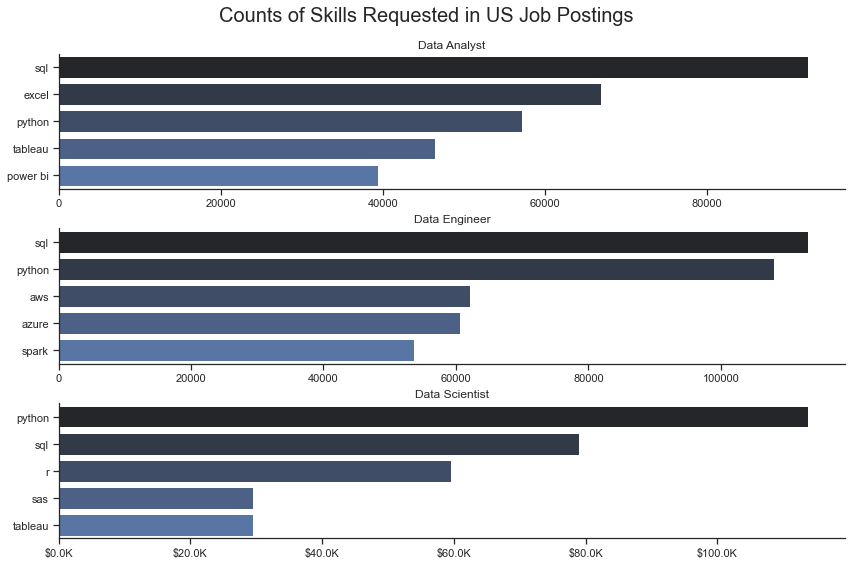

In [62]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(12, 8))

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)[::-1]
    sns.barplot(data = df_plot, x='skill_count',y='job_skills',ax=ax[i],palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    sns.despine()
    ax[i] = plt.gca()
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000}K'))

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=20)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

#### Convert Counts to Percentages

##### Focus: Counts don't show what portions of jobs are requesting these skills

So we'll convert the counts into percentages which helps us understand how each job title represents relative to the entire dataset. 

Before we can calculate the percentages we need the total counts for the jobs posted by job title. Calculate the frequency of each job title using the `value_counts()` method on the `job_title_short` column. Then reset the index to transform the Series into a DataFrame and renames the columns to `job_title_short` and `total`. The DataFrame `df_job_title_count` now holds a list of job titles alongside their total occurrences.

In [83]:
# Use original df to get the count of job titles
df_job_title_count = df['job_title_short'].value_counts().to_frame(name='job_total')

df_job_title_count.reset_index(inplace=True)
df_job_title_count.rename(columns={'index':'job_title_short'},inplace=True)

df_job_title_count

,job_title_short,job_total
0,Data Analyst,196075
1,Data Engineer,186241
2,Data Scientist,172286
3,Business Analyst,49063
4,Software Engineer,44929
5,Senior Data Engineer,44563
6,Senior Data Scientist,36957
7,Senior Data Analyst,29216
8,Machine Learning Engineer,14080
9,Cloud Engineer,12331


In [85]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['job_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,python,Data Scientist,113711,172286,66.001300
1,sql,Data Engineer,113130,186241,60.743875
2,python,Data Engineer,108022,186241,58.001192
3,sql,Data Analyst,92428,196075,47.139105
4,sql,Data Scientist,78982,172286,45.843539
...,...,...,...,...,...
2251,webex,Senior Data Scientist,1,36957,0.002706
2252,mattermost,Data Scientist,1,172286,0.000580
2253,clickup,Machine Learning Engineer,1,14080,0.007102
2254,heroku,Senior Data Analyst,1,29216,0.003423


### Plot Percentage Count

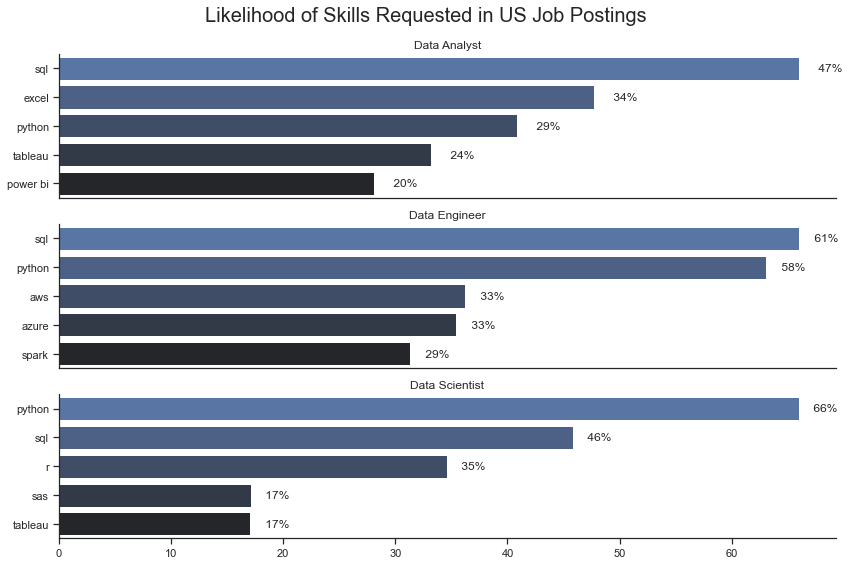

In [90]:
fig, ax = plt.subplots(len(job_titles), 1,figsize=(12, 8))

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short']==job_title].head()
    sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
    # put percentage label on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1, n, f'{v: .0f}%',va='center')
sns.despine()
fig.suptitle('Likelihood of Skills Requested Job Postings', fontsize=20)
fig.tight_layout(h_pad=0.5) # fix the overlap    

plt.show()

In [94]:
df_skills_africa = df_skills[df_skills['continent']=='Africa']

df_skills_count_continent = df_skills_africa.groupby(['job_skills','job_title_short']).size()
df_skills_count_continent = df_skills_count_continent.reset_index(name='skill_count')
df_skills_count_continent.sort_values(by='skill_count',ascending=False,inplace=True)

df_skills_count_continent

# df_skills_africa.head()

,job_skills,job_title_short,skill_count
1107,python,Data Scientist,8420
1390,sql,Data Engineer,7198
1106,python,Data Engineer,6446
1391,sql,Data Scientist,6169
1139,r,Data Scientist,4996
...,...,...,...
1547,typescript,Senior Data Analyst,1
214,clickup,Data Engineer,1
589,haskell,Senior Data Scientist,1
213,clickup,Data Analyst,1


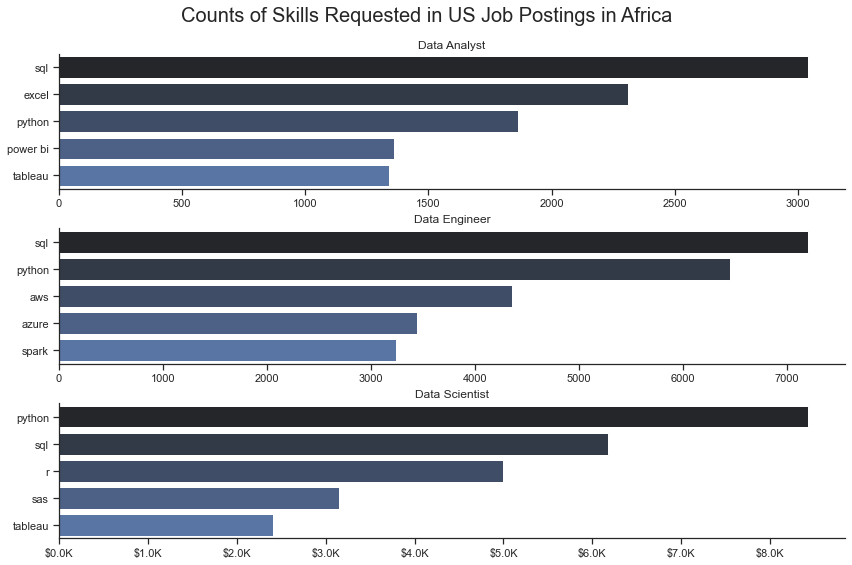

In [95]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(12, 8))

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count_continent[df_skills_count_continent['job_title_short']==job_title].head(5)[::-1]
    sns.barplot(data = df_plot, x='skill_count',y='job_skills',ax=ax[i],palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    sns.despine()
    ax[i] = plt.gca()
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000}K'))

fig.suptitle('Counts of Skills Requested in US Job Postings in Africa', fontsize=20)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

In [97]:
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


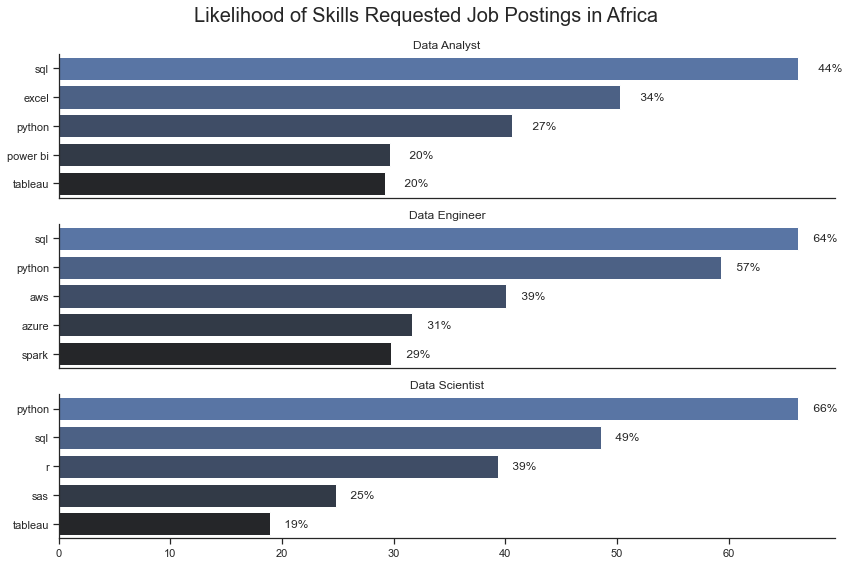

In [98]:
# Use original df to get the count of job titles in Africa
df_africa_jobs = df_merged[df_merged['continent']=='Africa']
df_job_title_count = df_africa_jobs['job_title_short'].value_counts().to_frame(name='job_total')
df_job_title_count.reset_index(inplace=True)
df_job_title_count.rename(columns={'index':'job_title_short'},inplace=True)

#skills required in africa merged with the total count to get percentage
df_skills_perc = pd.merge(df_skills_count_continent, df_job_title_count, on='job_title_short', how='left')
df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['job_total']) * 100

fig, ax = plt.subplots(len(job_titles), 1,figsize=(12, 8))

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short']==job_title].head()
    sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
    # put percentage label on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1, n, f'{v: .0f}%',va='center')
sns.despine()
fig.suptitle('Likelihood of Skills Requested Job Postings in Africa', fontsize=20)
fig.tight_layout(h_pad=0.5) # fix the overlap    

plt.show()

> Comparing the results between Africa and the overall job market the required skill set mentioned on job posted is almost the same.